In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [18]:

# Load your breast cancer dataset (replace 'data.csv' with your dataset)
data = pd.read_csv('breast-cancer.csv')


In [19]:

# Separate features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']


In [20]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:

# Standardize features (optional but often beneficial)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Random-Forest

In [22]:


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [23]:
# Make predictions on the test set
y_pred_rf = model.predict(X_test)



In [24]:
# Evaluate the model's performance
accuracy_1 = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
classification_rep = classification_report(y_test, y_pred_rf)

print("Accuracy:", accuracy_1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9649122807017544
Confusion Matrix:
 [[70  1]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Logistic Regression

In [25]:


# Initialize and train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [26]:

# Make predictions on the test set
y_pred_lr = model.predict(X_test)


In [27]:

# Evaluate the model's performance
accuracy_2 = accuracy_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
classification_rep = classification_report(y_test, y_pred_lr)

print("Accuracy:", accuracy_2)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9736842105263158
Confusion Matrix:
 [[70  1]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Support Vector Machine

In [28]:


# Initialize and train an SVM model
model = SVC(kernel='linear', random_state=42)  # You can choose different kernels like 'rbf' or 'poly'
model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [29]:

# Make predictions on the test set
y_pred_svm = model.predict(X_test)


In [30]:

# Evaluate the model's performance
accuracy_3 = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
classification_rep = classification_report(y_test, y_pred_svm)

print("Accuracy:", accuracy_3)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.956140350877193
Confusion Matrix:
 [[68  3]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.96      0.96        71
           M       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



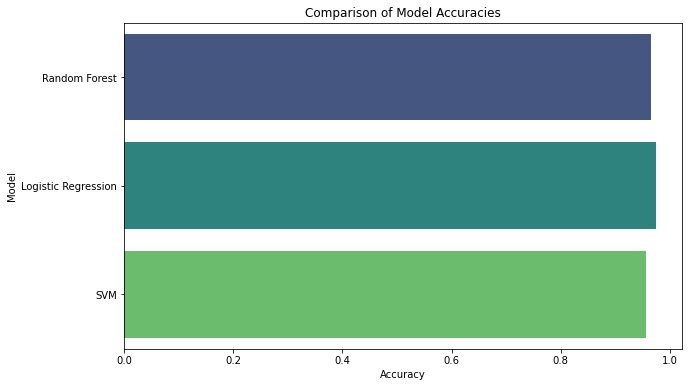

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
models = ['Random Forest','Logistic Regression','SVM']

# Train and evaluate each model, storing the accuracy
accuracies = {}
accuracies[models[0]] = accuracy_1
accuracies[models[1]] = accuracy_2
accuracies[models[2]] = accuracy_3

# Create a bar plot to compare accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.values()), y=list(accuracies.keys()), palette="viridis")
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Comparison of Model Accuracies')
plt.show()

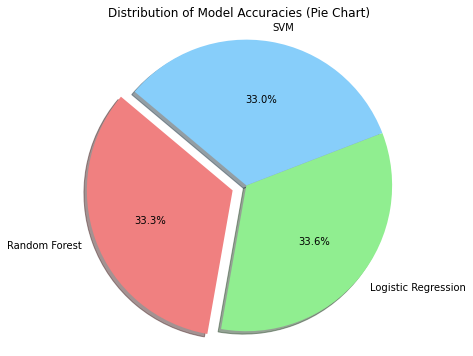

In [35]:

# Create a pie chart to visualize the distribution of accuracies
plt.figure(figsize=(6, 6))
labels = list(accuracies.keys())
sizes = list(accuracies.values())
explode = (0.1, 0, 0)  # Explode the 1st slice (Random Forest)
colors = ['lightcoral', 'lightgreen', 'lightskyblue']  # Colors for each slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Model Accuracies (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()






# From this we can see that Logistic Regression Gives us the best accuracy. Hence, The best predictive model for breast-cancer diagnosis is Logistic Regression with the accuracy of 97.36%